In [38]:
import pandas as pd
import re
from sklearn.feature_extraction.text import CountVectorizer
from nltk.tokenize import word_tokenize
import nltk
from bs4 import BeautifulSoup
import unidecode
from wordcloud import WordCloud
import matplotlib.pyplot as plt
%matplotlib inline

In [41]:
data = pd.read_csv('../dataset/vagalume.csv')
data['genre'].unique()

array(['axe', 'gospel', 'rock', 'pop', 'sertanejo', 'samba', 'mpb',
       'funk-carioca', 'pagode', 'forro', 'infantil', 'bossa-nova',
       'jovem-guarda', 'velha-guarda'], dtype=object)

In [94]:
def proccess_text(text):
    # clear HTML tags
    new_text = BeautifulSoup(str(text), 'html').get_text()
    # clear portuguese accents
    new_text = unidecode.unidecode(new_text)
    # to lower
    new_text = str(new_text).lower()
    # removing non-lether characters
    new_text = re.sub('\\d+x', ' ', new_text)
    new_text = re.sub('[^a-z]', ' ', new_text)
    # tokenization via NLTK
    tokenized_text = word_tokenize(new_text, language='portuguese')
    # removing stopwords via NLTK
    stops = list(map(unidecode.unidecode, nltk.corpus.stopwords.words('portuguese')))
    tokens = [t for t in tokenized_text if t not in stops]
    
    return ' '.join(tokens)

In [95]:
novo_data = proccess_text(data.iloc[130]['music_lyric'])
print(novo_data)

acima todos acima tudo senhor entronizado anjos homens ceus terra montanhas mares declaram es es senhor rei governas sobre universo justo fiel vestido gloria poder coroado pra sempre reinara prostados pes erguemos santo nome adoracao entregamos ti toma lugar habita oh santo deus santo deus es santo


In [98]:
funk_lyrics = data[data['genre'] == 'gospel']
funk_lyrics_list = funk_lyrics['music_lyric'].apply(proccess_text).to_list()

/tmp/ipykernel_13582/3309774863.py:3: MarkupResemblesLocatorWarning: The input looks more like a filename than markup. You may want to open this file and pass the filehandle into Beautiful Soup.
  new_text = BeautifulSoup(str(text), 'html').get_text()


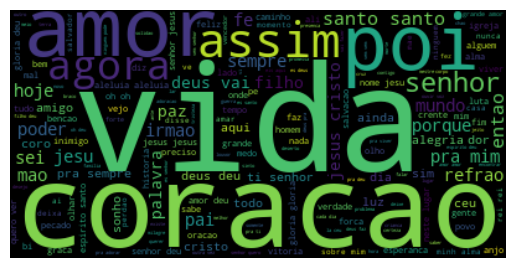

In [99]:
# Create and generate a word cloud image:
wordcloud = WordCloud().generate(' '.join(funk_lyrics_list))

# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()